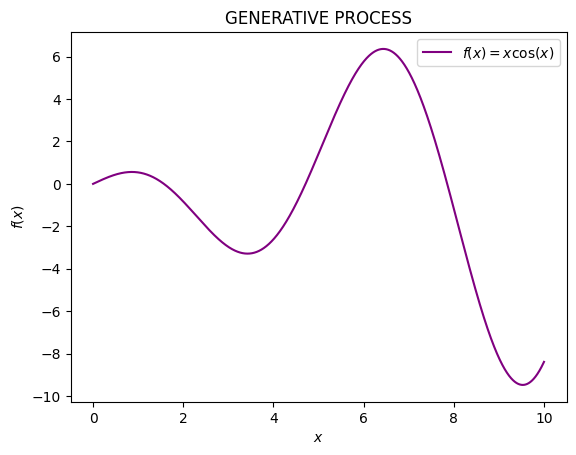

In [38]:
# Import necessary libraries
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import Matern

# Generate x-axis values from 0 to 10 with 99999 points and reshape it to a column vector
axis = np.linspace(start=0, stop=10, num=99999).reshape(-1, 1)

# Generate corresponding y-axis values using the function f(x) = x * cos(x)
ordinate = np.squeeze(axis * np.cos(axis))

# Import matplotlib library for plotting
import matplotlib.pyplot as plt

# Create a plot of the data with a purple solid line and a label
plt.plot(axis, ordinate, label=r"$f(x) = x \cos(x)$", linestyle="solid", color="purple")

# Add a legend to the plot
plt.legend()

# Set labels for the x and y axes
plt.xlabel("$x$")
plt.ylabel("$f(x)$")

# Set the title of the plot
output = plt.title("GENERATIVE PROCESS")

# Display the plot
plt.show()

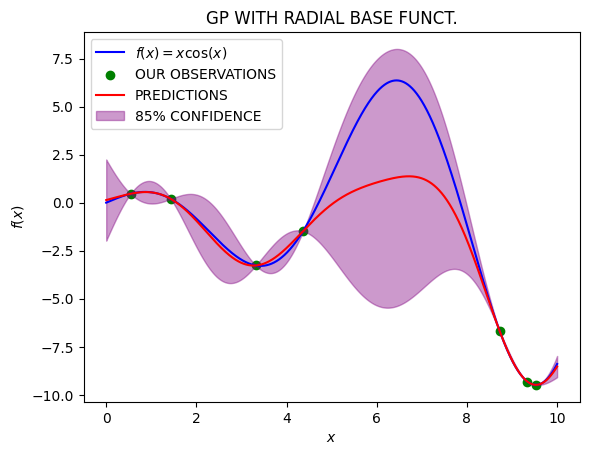

In [39]:
# Import necessary libraries
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

# Create a random number generator with a fixed seed
generateRandom = np.random.RandomState(1)

# Generate random indices for training the model
indexForTrainingTheModel = generateRandom.choice(np.arange(ordinate.size), size=7, replace=False)

# Select training data points based on the generated indices
trainAxis, trainOrdinate = axis[indexForTrainingTheModel], ordinate[indexForTrainingTheModel]

# Define the RBF kernel for Gaussian Process
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))

# Create a Gaussian Process Regressor with the defined kernel
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit the Gaussian Process model to the training data
gp.fit(trainAxis, trainOrdinate)

# Get the learned kernel parameters
gp.kernel_

# Make predictions using the trained model and compute standard deviations
meanPrediction, predictedStandardDeviation = gp.predict(axis, return_std=True)

# Import matplotlib library for plotting
import matplotlib.pyplot as plt

# Create a plot of the original function with a blue solid line
plt.plot(axis, ordinate, label=r"$f(x) = x\cos(x)$", linestyle="solid", color="blue")

# Scatter plot of the training data points in green
plt.scatter(trainAxis, trainOrdinate, label="OUR OBSERVATIONS", color="green")

# Plot the mean predictions in red
plt.plot(axis, meanPrediction, label="PREDICTIONS", color="red")

# Fill the area between lower and upper confidence bounds (purple)
plt.fill_between(
    axis.ravel(),
    meanPrediction - 1.86 * predictedStandardDeviation,
    meanPrediction + 1.86 * predictedStandardDeviation,
    alpha=0.4,
    label=r"85% CONFIDENCE",
    color="purple",
)

# Add a legend to the plot
plt.legend()

# Set labels for the x and y axes
plt.xlabel("$x$")
plt.ylabel("$f(x)$")

# Set the title of the plot
output = plt.title("GP WITH RADIAL BASE FUNCT.")

# Display the plot
plt.show()

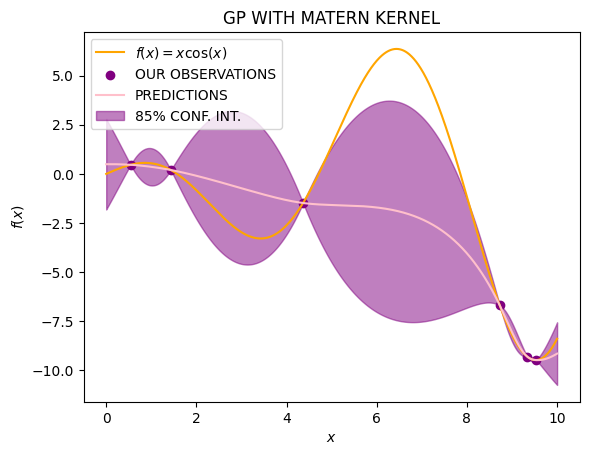

In [40]:
# Import necessary libraries
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern

# Create a random number generator with a fixed seed
generateRandom = np.random.RandomState(1)

# Generate random indices for training the model
indexForTrainingTheModel = generateRandom.choice(np.arange(ordinate.size), size=6, replace=False)

# Select training data points based on the generated indices
trainAxis, trainOrdinate = axis[indexForTrainingTheModel], ordinate[indexForTrainingTheModel]

# Define the Matern kernel for Gaussian Process with nu=1.5
kernel = 1 * Matern(length_scale=1.0, length_scale_bounds=(1e-2, 1e2), nu=1.5)

# Create a Gaussian Process Regressor with the defined kernel
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit the Gaussian Process model to the training data
gp.fit(trainAxis, trainOrdinate)

# Get the learned kernel parameters
gp.kernel_

# Make predictions using the trained model and compute standard deviations
meanPrediction, predictedStandardDeviation = gp.predict(axis, return_std=True)

# Import matplotlib library for plotting
import matplotlib.pyplot as plt

# Create a plot of the original function with an orange solid line
plt.plot(axis, ordinate, label=r"$f(x) = x \cos(x)$", linestyle="solid", color="orange")

# Scatter plot of the training data points in purple
plt.scatter(trainAxis, trainOrdinate, label="OUR OBSERVATIONS", color="purple")

# Plot the mean predictions in pink
plt.plot(axis, meanPrediction, label="PREDICTIONS", color="pink")

# Fill the area between lower and upper confidence bounds (purple) with increased alpha for transparency
plt.fill_between(
    axis.ravel(),
    meanPrediction - 1.86 * predictedStandardDeviation,
    meanPrediction + 1.86 * predictedStandardDeviation,
    alpha=0.5,  # Increased alpha for more transparency
    label=r"85% CONF. INT.",
    color="purple",
)

# Add a legend to the plot
plt.legend()

# Set labels for the x and y axes
plt.xlabel("$x$")
plt.ylabel("$f(x)$")

# Set the title of the plot
output = plt.title("GP WITH MATERN KERNEL")

# Display the plot
plt.show()